In [1]:
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv(r'New_DataV2.csv',header=0)
data

,Unnamed: 0,name,sweet,vanilla,smokey,chacho,sherry,cereals,fruit,spices,green,Old,flower,smooth,alcohol,rough,balance,salty
0,0,Old Pulteney 21 Year Old,1,2,3,1,0,1,3,2,0,0,0,5,0,0,0,0
1,1,Glenkinchie 12 Year Old,82,4,42,6,2,18,100,14,19,6,21,109,29,11,8,1
2,2,Unnamed: 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,"hat mor""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Lagavulin 16 Year Old,23,19,312,11,11,3,12,21,2,6,1,50,29,4,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,434,Old Forester Bourbon,8,4,0,4,0,4,8,13,2,9,0,10,5,1,0,0
435,435,Writers Tears Cask Strength 2017 Release,0,0,0,3,0,0,6,5,0,0,0,2,0,0,0,0
436,436,Hakushu The Hakushu Single Malt Whisky Distill...,1,2,6,0,0,0,6,4,2,0,0,3,0,0,0,0
437,437,Wyoming Whiskey Barrel Strength,5,1,1,1,0,0,1,3,0,1,0,0,0,0,0,0


In [3]:
data = data.drop(['name'], axis=1)
data = data.drop(['Unnamed: 0'], axis = 1)

In [4]:
data

,sweet,vanilla,smokey,chacho,sherry,cereals,fruit,spices,green,Old,flower,smooth,alcohol,rough,balance,salty
0,1,2,3,1,0,1,3,2,0,0,0,5,0,0,0,0
1,82,4,42,6,2,18,100,14,19,6,21,109,29,11,8,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23,19,312,11,11,3,12,21,2,6,1,50,29,4,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,8,4,0,4,0,4,8,13,2,9,0,10,5,1,0,0
435,0,0,0,3,0,0,6,5,0,0,0,2,0,0,0,0
436,1,2,6,0,0,0,6,4,2,0,0,3,0,0,0,0
437,5,1,1,1,0,0,1,3,0,1,0,0,0,0,0,0


In [7]:
from sklearn.decomposition import PCA
x = data.values
pca = PCA(3)
pca = pca.fit(x)
x_dr = pca.transform(x)
x_dr

array([[  -7.93356724,    2.81126333,   -1.09623106],
       [ 115.21460662, -104.09958618,  -36.25794027],
       [ -13.92039183,    6.22625278,   -0.92882796],
       ...,
       [  -5.51869279,    4.59675815,   -1.64215315],
       [ -11.03025221,    4.17457368,    0.75992911],
       [ -11.7950171 ,    3.46004473,    0.29219   ]])

findfont: Font family ['SimSum'] not found. Falling back to DejaVu Sans.


<class 'numpy.ndarray'>
labels [ 0  9  7  7 12  7  7  2 15  3  5 10  6 18  7  6  2 18  0 16  7  7  0  7
  0  7  7  6  7  7  7  7  7  6 16  7  7  0  7  6  0 18 18  7  2  7  7  7
  7  7  7  7 10  0  7  0  5  7 16  5  7  7  7  7  7 15 11  7  7  6 16 15
  0  0  0 16  7  0  7  7  7  7  7  7  0  7  7  7  0  7  7  7  7  8  7  7
  7  7  1 16  7  0  7  7  7  7  7 13  7  0  7  7  7  7  7  7 16  7 16  7
  0  7  7  7  7  7  2  2  2 18  7 10  7  5  7  7 18  0  7  7  7  2  7  6
  4  7  7 18  7  0  7  7  7 16 18  2  0  7  0  7  7  7  8  7  7  7  0  7
  7  7  7  0  8  7  7  0 16  7  7  7  0  7  7  7  7  0  7  0  7  7 19  7
  7  7  0  7  7  7 18  7  7  7  7  0  7  7  7  7  7  0  7  7  7 18  0  7
  7  7  7  7  0  7 10 13 10  7  0  6 10 19  8 18 18 13 10  0  0  7  7 14
  5 10  4 10 18  2 10 13 10  7 13  9  7  0  0  4 10 17  7 13 13 10  5  5
 18 18 18 18  9  7  7  0 13 16  0 16 16 16  0 18 16  7 13  7  7 13  5  0
  0  0  7  0  0  7  7 18  7  0  7  7 14 10  7  7  0 18  7  0  7  7  7  7
  5  7  0  7  7 18  

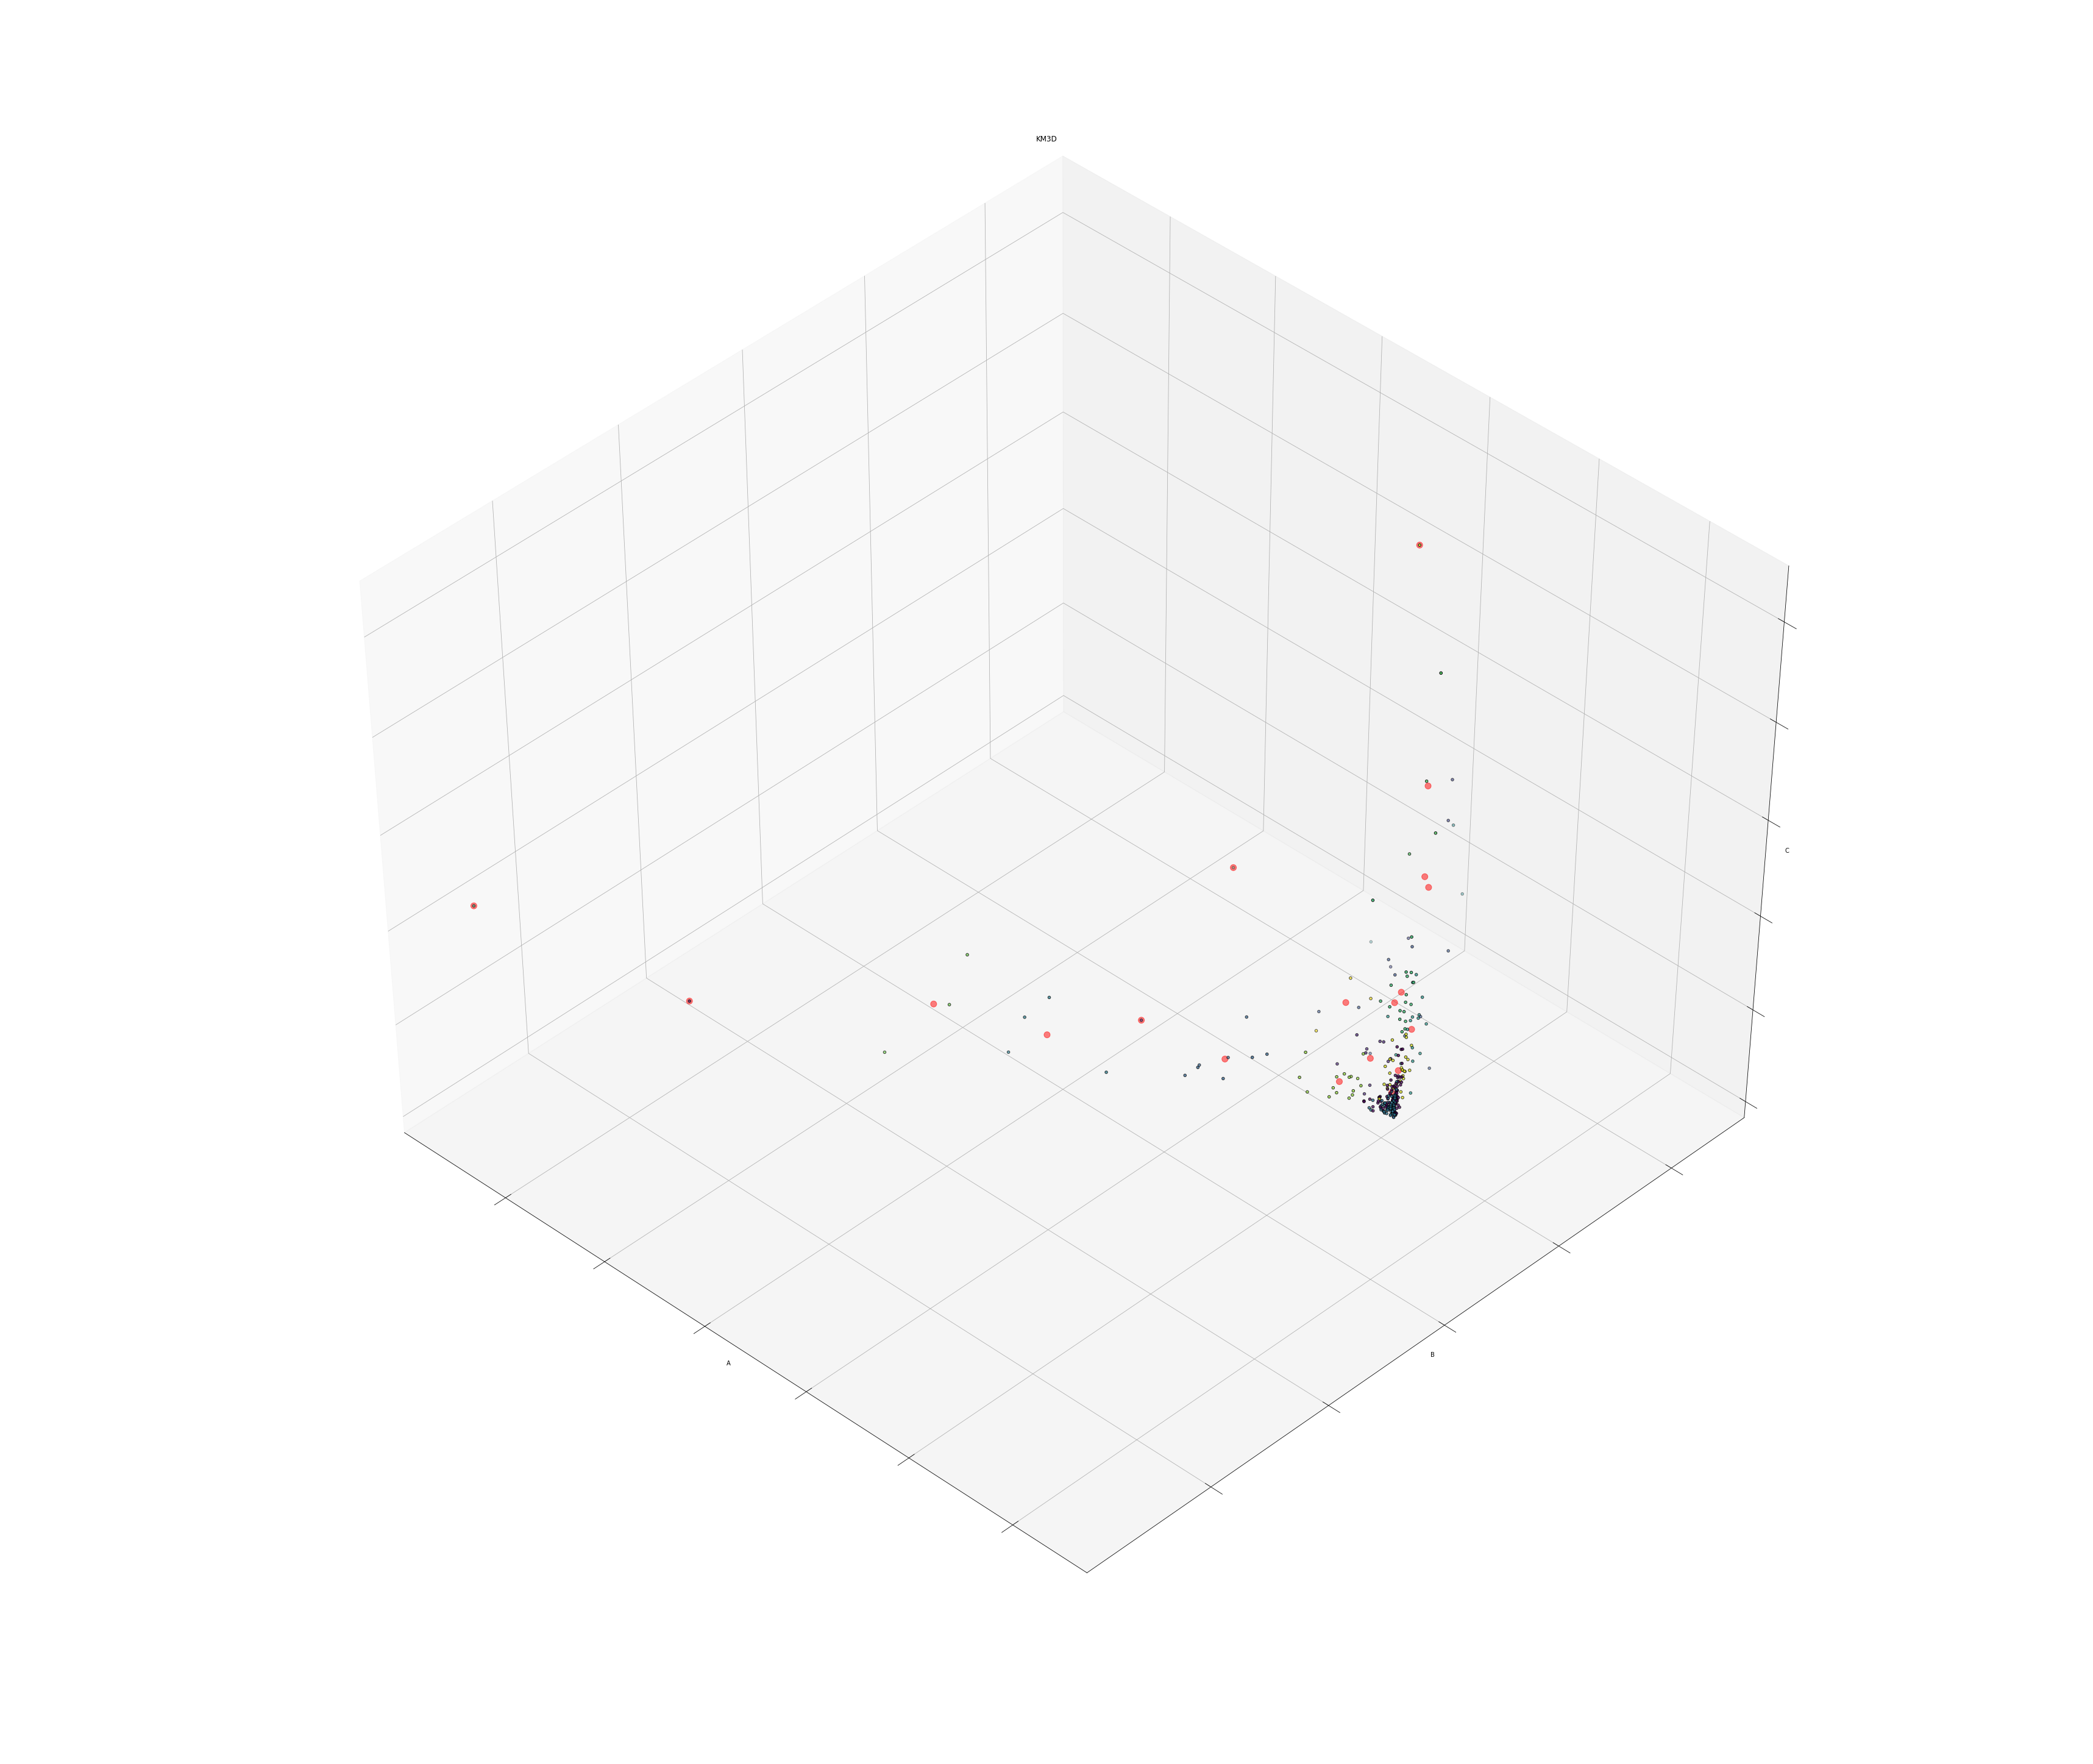

In [8]:
np.random.seed(5)

X = x_dr
model = KMeans(n_clusters=20)
model.fit(X)
labels = model.labels_
print(type(labels))
print("labels", labels, labels.shape)

fig = plt.figure('f0', figsize=(50, 40))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float), edgecolors='k')

C = model.cluster_centers_
ax.scatter(C[:, 0], C[:, 1], C[:, 2], c='red', s=100, alpha=0.5)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('A', fontproperties="SimSum")
ax.set_ylabel('B', fontproperties="SimSum")
ax.set_zlabel('C', fontproperties="SimSum")
ax.set_title("KM3D")
ax.dist = 12
plt.show()